In order to emulate the potential of a donor-bridge-acceptor system, we use a 
potential of three harmonic oscillator wells. 

We begin with the necessary imports:

In [1]:
from matplotlib.pyplot import subplots
import numpy as np


from quantized.potentials import TripleWell

## Definition of the triple well

In the library, basically every concept used is an [attrs](https://www.attrs.org/en/stable/) class. In many
cases, the classes support the `__call__` method, which means they behave as an ordinary
python function would. In the case of the triple well potential, we can create a new potential, and later
call it just like any function `V(x)` would be called. 

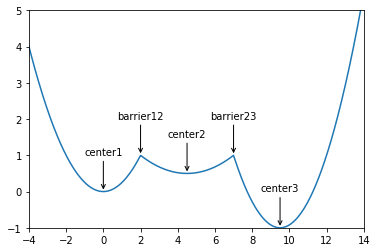

In [2]:
triple_well = TripleWell.from_params(
    well1_depth=1.0,
    well1_halfwidth=2.0,
    bridge_length=5.0,
    bridge_depth=0.5,
    well3_halfwidth=2.5,
    well3_depth=2,
)

x = np.linspace(-10, 20, 1000)
y = triple_well(x)

# Plot everything
fig, ax = subplots()
ax.plot(x, y)

# Label the points of interest
attrs = ["center1", "center2", "center3", "barrier12", "barrier23"]
for i, attr in enumerate(attrs):
    point = getattr(triple_well, attr)
    ax.annotate(attr, point, xytext=(point[0], point[1] + 1), arrowprops=dict(arrowstyle="->"), horizontalalignment="center")
ax.set_xlim(-4, 14)
_ = ax.set_ylim(-1, 5)

The triple well is uniquely specified by these five points, and that is the most convenient
way to specify the potential. The `TripleWellPotential.from_params` function knows how to convert those
parameters into the piecewise function of parabolas that truly defines the potential:

$$
{
  V(x) = \left.
  \begin{cases}
    p_1(x), & \text{for } -\infty \lt x \leq {barrier}_{12} \\
    p_2(x), & \text{for } {barrier}_{12} \lt x \lt {barrier}_{23} \\
    p_3(x), & \text{for } {barrier}_{23} \leq x \lt \infty
  \end{cases}
  \right\}
}
$$

The Parabolas for each well can be recovered directly from the triple well object:

In [3]:
triple_well.well1

Parabola(a=0.25, b=-0.0, c=0.0)

## Using the well to make a basis

Creating harmonic oscillator wave functions directly from parabolas is also supported:

In [4]:
from quantized.basis import HarmonicOscillator

ho = HarmonicOscillator.from_parabola(triple_well.well1, n=0)
ho

HarmonicOscillator(n=0, center=0.0, mass=1.0, omega=0.7071067811865476)

As you can see, the library automatically figures out the frequency of the potential well, directly
from the shape of the parabola. Just like the potential function, the harmonic oscillator is also
a class that supports `__call__`, so it acts just like an ordinary function of `x` would. Let's see
what the ground state harmonic oscillator function looks like in the first well of the potential:

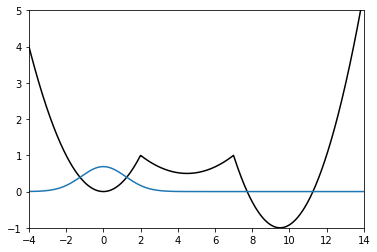

In [5]:
fig, ax = subplots()
ax.plot(x, triple_well(x), color="k")
ax.plot(x, ho(x))
ax.set_xlim(-4, 14)
_ = ax.set_ylim(-1, 5)

Lovely! But we won't get far with just one function, we need an entire basis. We
can generate a whole suite of harmonic oscillator functions from our potential
well. We simply generate all harmonic oscillators up to a predefined cutoff energy:

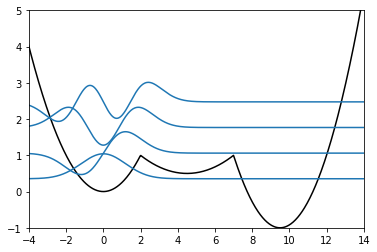

In [6]:
from quantized.basis import harmonic_basis_from_parabola
well1_basis = harmonic_basis_from_parabola(triple_well.well1, cutoff_energy=2.5)
well1_basis

fig, ax = subplots()
ax.plot(x, triple_well(x), color="k")
for basis_func in well1_basis:
    ax.plot(x, basis_func(x) + basis_func.energy, color="C0")
    
ax.set_xlim(-4, 14)
_ = ax.set_ylim(-1, 5)

Voila! We've generated four harmonic oscillator functions in the first well. 
Now we need to generate some more functions for the other wells, so that
our basis spans the whole region. 

In [7]:
well2_basis = harmonic_basis_from_parabola(triple_well.well2, cutoff_energy=1.5)
well3_basis = harmonic_basis_from_parabola(triple_well.well3, cutoff_energy=1.5)

print("Well 2")
display(well2_basis)
print("Well 3")
display(well3_basis)

Well 2


[HarmonicOscillator(n=0, center=4.5, mass=1.0, omega=0.39999999999999986),
 HarmonicOscillator(n=1, center=4.5, mass=1.0, omega=0.39999999999999986),
 HarmonicOscillator(n=2, center=4.5, mass=1.0, omega=0.39999999999999986),
 HarmonicOscillator(n=3, center=4.5, mass=1.0, omega=0.39999999999999986)]

Well 3


[HarmonicOscillator(n=0, center=9.5, mass=1.0, omega=0.7999999999999992),
 HarmonicOscillator(n=1, center=9.5, mass=1.0, omega=0.7999999999999992)]

And to get a look at all of them together, we can plot all at once:

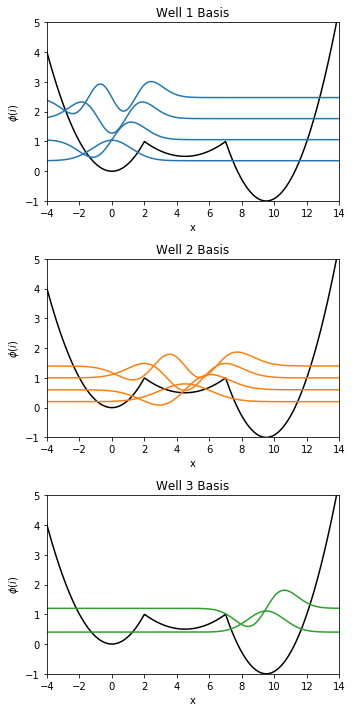

In [8]:
fig, ax = subplots(nrows=3, figsize=(5, 10))
for i in range(3):
    ax[i].plot(x, triple_well(x), color="k")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("$\phi(i)$")
    ax[i].set_xlim(-4, 14)
    ax[i].set_ylim(-1, 5)
    ax[i].set_title(f"Well {i+1} Basis")

for basis_func in well1_basis:
    ax[0].plot(x, basis_func(x) + basis_func.energy, color="C0")

    
for basis_func in well2_basis:
    ax[1].plot(x, basis_func(x) + basis_func.energy, color="C1")
    
for basis_func in well3_basis:
    ax[2].plot(x, basis_func(x) + basis_func.energy, color="C2")

fig.tight_layout()